In [15]:
from matplotlib import rc
# rc('text', usetex=True)

import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid")

In [42]:
def annotate_label(bar, value, size):
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(value),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                size=size,
                textcoords="offset points",
                ha='center', va='bottom')

In [43]:
df = pd.read_csv('random-jsp.csv').set_index('Size')
df

,ScheduleNet,CP-SAT,MOR,SPT,FIFO
Size,,,,,
30 x 20,2295.500000,1986.110000,2372.680000,2564.17,2535.680000
50 x 20,3238.040000,3124.290000,3366.130000,3675.06,3546.170000
100 x 20,5790.314286,5897.285714,5921.057143,6342.40,6113.542857


In [44]:
algos = df.columns.to_list()
sizes = df.index.to_list()

In [45]:
means = df.to_numpy()
means = means / np.reshape(means[:,0], (-1,1))

In [48]:
bar_width = 0.15
x_label_size = 15
annote_size = 12

hatchs = ['//', '/', 'x']
y_min, y_max = 0.8, 1.2

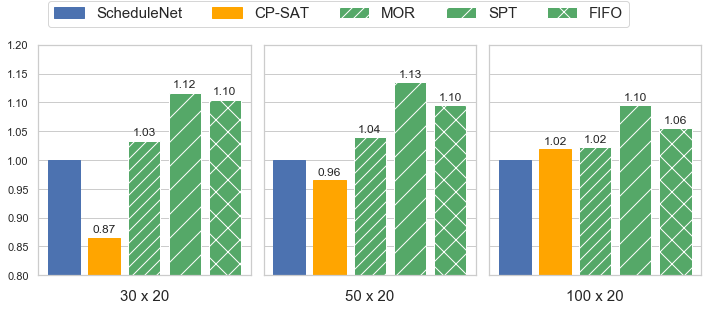

In [61]:
fig, axes = plt.subplots(1,len(sizes), figsize=(10,4), sharey=True)
for i, (size, ax, mean) in enumerate(zip(sizes, axes, means)):
    bars = ax.bar(np.arange(len(algos)) + bar_width, mean, color='g')
    ax.set_xlabel(size, size=x_label_size)
    ax.set_xticklabels([])
    
    for ii, bar in enumerate(bars):
        if ii == 0: # Snet
            bar.set_color('b')
            
        elif ii == 1: # CP-SAT (An exact solver from or-tools)
            bar.set_color('orange')
            annotate_label(bar, mean[ii], annote_size)        
        else: # PDRs
            bar.set_hatch(hatchs[ii-2])
            annotate_label(bar, mean[ii], annote_size)        
    ax.set_ylim(y_min, y_max)
    ax.grid(axis='x')

fig.legend(bars, algos, ncol=len(algos), loc='upper center',
           bbox_to_anchor=(0.47, 1.10), fontsize=15)    
fig.tight_layout()